# Einleitung

In dieser Fallstudie wollen wir den Data Science Process anhand eines realen Fallbeispiels durchlaufen.
Konkret geht es darum Immobiliendaten zu analysieren.

Ausgangspunkt der Fallstudie ist der Wunsch eines Immobilienmaklers auf dem Markt erzielbare Immobilienpreise vorhersagen zu können aufgrund der Merkmale einer Immobilie.

# Datensatz beschaffen (Obtain Data)

Bei Kaggle 

https://www.kaggle.com/

können wir viele Datensätze finden. Diesen hier verwenden wir im Folgenden:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Der Datensatz enthält in den Trainingsdaten 1460 Beispiele von Häusern, wobei deren Eigenschaften und deren jeweiliger tatsächlicher Verkaufspreis aufgeführt ist.

# Pandas

## Datensatz einlesen (Reading Data)

In [1]:
import pandas

In [2]:
t = pandas.read_csv("daten/hausbeispiele.csv")

In [3]:
t

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
t.shape

(1460, 81)

## Zugriff auf einzelne Spalten

In [5]:
t.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
t2 = t[ ["YearBuilt", "LotArea", "OverallQual", "MSZoning", "SalePrice" ] ]

In [7]:
t2

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
0,2003,8450,7,RL,208500
1,1976,9600,6,RL,181500
2,2001,11250,7,RL,223500
3,1915,9550,7,RL,140000
4,2000,14260,8,RL,250000
...,...,...,...,...,...
1455,1999,7917,6,RL,175000
1456,1978,13175,6,RL,210000
1457,1941,9042,7,RL,266500
1458,1950,9717,5,RL,142125


## Zugriff auf einzelne oder mehrere Zeilen

In [8]:
t2.iloc[0]

YearBuilt        2003
LotArea          8450
OverallQual         7
MSZoning           RL
SalePrice      208500
Name: 0, dtype: object

In [9]:
t2.iloc[0:5]

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
0,2003,8450,7,RL,208500
1,1976,9600,6,RL,181500
2,2001,11250,7,RL,223500
3,1915,9550,7,RL,140000
4,2000,14260,8,RL,250000


In [10]:
t2.iloc[ [0,1,2,1458,1459] ]

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
0,2003,8450,7,RL,208500
1,1976,9600,6,RL,181500
2,2001,11250,7,RL,223500
1458,1950,9717,5,RL,142125
1459,1965,9937,5,RL,147500


## Filtern nach Bedingungen

In [11]:
t2[ t2["YearBuilt"] == 2005 ]

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
11,2005,11924,9,RL,345000
20,2005,14215,8,RL,325300
34,2005,7313,9,RL,277500
45,2005,7658,9,RL,319900
86,2005,11911,6,RL,174000
...,...,...,...,...,...
1374,2005,10625,7,FV,250000
1395,2005,12665,8,RL,281213
1413,2005,10994,8,RL,257000
1430,2005,21930,5,RL,192140


In [12]:
len( t2[ t2["YearBuilt"] == 2005 ] )

64

In [13]:
t2[ t2["YearBuilt"] >= 2000 ]

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
0,2003,8450,7,RL,208500
2,2001,11250,7,RL,223500
4,2000,14260,8,RL,250000
6,2004,10084,8,RL,307000
11,2005,11924,9,RL,345000
...,...,...,...,...,...
1444,2004,8500,7,RL,179600
1451,2008,9262,8,RL,287090
1452,2005,3675,5,RM,145000
1453,2006,17217,5,RL,84500


In [14]:
t2[ (t2["YearBuilt"] >= 2000) & (t2["SalePrice"] <= 140000) ]

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
145,2004,2522,6,RM,130000
193,2004,2522,7,RM,130000
200,2003,8546,4,RM,140000
593,2003,4435,6,RM,140000
850,2003,4435,6,RM,131500
1088,2004,2522,7,RM,137500
1297,2005,3675,6,RM,140000
1304,2004,3363,7,RM,130000
1422,2003,4435,6,RM,136500
1453,2006,17217,5,RL,84500


## Data Scrubbing: Daten auf Konsistenz überprüfen

In [15]:
t2.describe()

,YearBuilt,LotArea,OverallQual,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,10516.828082,6.099315,180921.195890
std,30.202904,9981.264932,1.382997,79442.502883
min,1872.000000,1300.000000,1.000000,34900.000000
25%,1954.000000,7553.500000,5.000000,129975.000000
50%,1973.000000,9478.500000,6.000000,163000.000000
75%,2000.000000,11601.500000,7.000000,214000.000000
max,2010.000000,215245.000000,10.000000,755000.000000


In [16]:
t3 = pandas.DataFrame( {"YearBuilt" : [3000, 4000], "SalePrice" : [0,10000000]}, index=[2000,2001] )

In [17]:
t3

,YearBuilt,SalePrice
2000,3000,0
2001,4000,10000000


In [18]:
t4 = pandas.concat( [t2, t3] )

In [19]:
t4

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
0,2003,8450.0,7.0,RL,208500
1,1976,9600.0,6.0,RL,181500
2,2001,11250.0,7.0,RL,223500
3,1915,9550.0,7.0,RL,140000
4,2000,14260.0,8.0,RL,250000
...,...,...,...,...,...
1457,1941,9042.0,7.0,RL,266500
1458,1950,9717.0,5.0,RL,142125
1459,1965,9937.0,5.0,RL,147500
2000,3000,NaN,NaN,NaN,0


In [20]:
t4.describe()

,YearBuilt,LotArea,OverallQual,SalePrice
count,1462.000000,1460.000000,1460.000000,1.462000e+03
mean,1973.359097,10516.828082,6.099315,1.875136e+05
std,66.693556,9981.264932,1.382997,2.688371e+05
min,1872.000000,1300.000000,1.000000,0.000000e+00
25%,1954.000000,7553.500000,5.000000,1.299250e+05
50%,1973.000000,9478.500000,6.000000,1.630000e+05
75%,2000.750000,11601.500000,7.000000,2.140000e+05
max,4000.000000,215245.000000,10.000000,1.000000e+07


In [21]:
t4[ t4["YearBuilt"] <= 2021 ]

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
0,2003,8450.0,7.0,RL,208500
1,1976,9600.0,6.0,RL,181500
2,2001,11250.0,7.0,RL,223500
3,1915,9550.0,7.0,RL,140000
4,2000,14260.0,8.0,RL,250000
...,...,...,...,...,...
1455,1999,7917.0,6.0,RL,175000
1456,1978,13175.0,6.0,RL,210000
1457,1941,9042.0,7.0,RL,266500
1458,1950,9717.0,5.0,RL,142125


In [22]:
t4

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
0,2003,8450.0,7.0,RL,208500
1,1976,9600.0,6.0,RL,181500
2,2001,11250.0,7.0,RL,223500
3,1915,9550.0,7.0,RL,140000
4,2000,14260.0,8.0,RL,250000
...,...,...,...,...,...
1457,1941,9042.0,7.0,RL,266500
1458,1950,9717.0,5.0,RL,142125
1459,1965,9937.0,5.0,RL,147500
2000,3000,NaN,NaN,NaN,0


In [23]:
t4.dropna()

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
0,2003,8450.0,7.0,RL,208500
1,1976,9600.0,6.0,RL,181500
2,2001,11250.0,7.0,RL,223500
3,1915,9550.0,7.0,RL,140000
4,2000,14260.0,8.0,RL,250000
...,...,...,...,...,...
1455,1999,7917.0,6.0,RL,175000
1456,1978,13175.0,6.0,RL,210000
1457,1941,9042.0,7.0,RL,266500
1458,1950,9717.0,5.0,RL,142125


# Arbeiten mit qualitativen Merkmalen

## Mögliche Werte eines qualitativen Merkmals

In [24]:
t2["MSZoning"]

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [25]:
t2["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [26]:
t2["MSZoning"].nunique()

5

In [27]:
t2[ t2["MSZoning"] == "RH" ]

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
341,1950,8400,4,RH,82000
383,1928,9000,6,RH,76000
543,1998,4058,7,RH,133000
635,1914,10896,6,RH,200000
671,1925,6629,6,RH,103600
681,1932,4500,5,RH,159434
778,1977,8400,5,RH,144000
840,1925,12155,6,RH,140000
913,1949,6270,5,RH,145000
951,1965,7800,5,RH,119900


In [28]:
t2["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

## Plotten der Auftretenshäufigkeit eines qualitativen Merkmals

In [29]:
import matplotlib.pyplot as plt

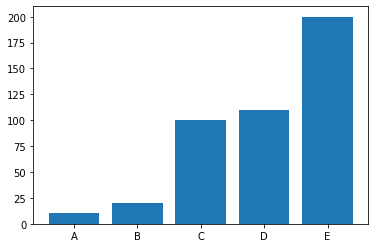

In [30]:
x = ["A", "B", "C", "D", "E"]
heights = [10,20,100,110,200]

plt.bar(x,heights)
plt.show()

In [31]:
x = t2["MSZoning"].value_counts().index
x

Index(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype='object')

In [32]:
heights = t2["MSZoning"].value_counts().values
heights

array([1151,  218,   65,   16,   10])

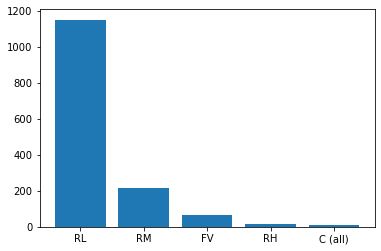

In [33]:
plt.bar(x,heights)
plt.show()

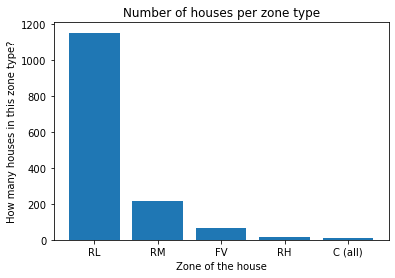

In [34]:
plt.bar(x,heights)
plt.xlabel("Zone of the house")
plt.ylabel("How many houses in this zone type?")
plt.title("Number of houses per zone type")
plt.show()

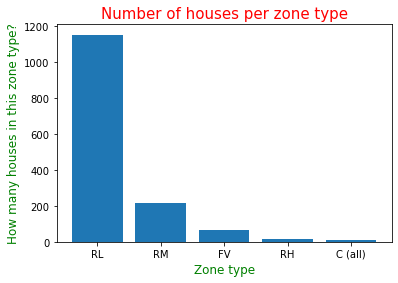

In [35]:
plt.bar(x,heights)
plt.xlabel("Zone type", fontsize=12, color="green")
plt.ylabel("How many houses in this zone type?", fontsize=12, color="green")
plt.title("Number of houses per zone type", fontsize=15, color="red")
plt.show()

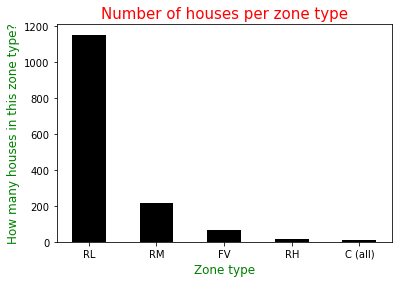

In [36]:
plt.bar(x,heights, width=0.5, color="black")
plt.xlabel("Zone type", fontsize=12, color="green")
plt.ylabel("How many houses in this zone type?", fontsize=12, color="green")
plt.title("Number of houses per zone type", fontsize=15, color="red")
plt.show()

0 1151
1 218
2 65
3 16
4 10


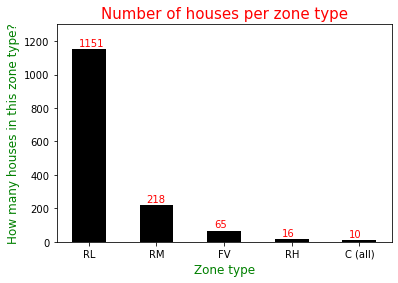

In [37]:
fig, ax = plt.subplots()
plt.bar(x,heights, width=0.5, color="black")
plt.xlabel("Zone type", fontsize=12, color="green")
plt.ylabel("How many houses in this zone type?", fontsize=12, color="green")
plt.ylim(0,1300)
plt.title("Number of houses per zone type", fontsize=15, color="red")

for i, v in enumerate(heights):
    print(i,v)
    ax.text(i-0.15, v+20, str(v), color = 'red')

plt.savefig("nr_houses_per_zone_type.pdf")
plt.show()

## Testen einer 1. Hypothese

Hypothese: Häuser in Wohngegenden mit geringer Siedlungsdichte kosten mehr

In [38]:
zone_types = t2["MSZoning"].unique()

In [39]:
zone_types

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [40]:
for zone in zone_types:
    print(zone)

RL
RM
C (all)
FV
RH


In [41]:
salesprices_houses = t2[ t2["MSZoning"]=="RL" ]["SalePrice"]
salesprices_houses

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1151, dtype: int64

In [42]:
salesprices_houses.min()

39300

In [43]:
salesprices_houses.max()

755000

In [44]:
salesprices_houses.median()

174000.0

In [45]:
salesprices_houses.mean()

191004.99478714162

In [46]:
means = []
for zone in zone_types:
    salesprices_houses = t2[ t2["MSZoning"]==zone ]["SalePrice"]
    mean_salesprice_of_such_houses = salesprices_houses.mean()
    print(zone, "-->", mean_salesprice_of_such_houses)
    means.append( mean_salesprice_of_such_houses )

RL --> 191004.99478714162
RM --> 126316.83027522935
C (all) --> 74528.0
FV --> 214014.06153846154
RH --> 131558.375


In [47]:
means

[191004.99478714162,
 126316.83027522935,
 74528.0,
 214014.06153846154,
 131558.375]

## Quiz: Generieren eines Balkendiagramms

Generieren Sie einen Boxplot bei dem man den mittleren Preis für die Häuser je Zone sieht.

In [48]:
x = zone_types
heights = means

0 191004.99478714162
1 126316.83027522935
2 74528.0
3 214014.06153846154
4 131558.375


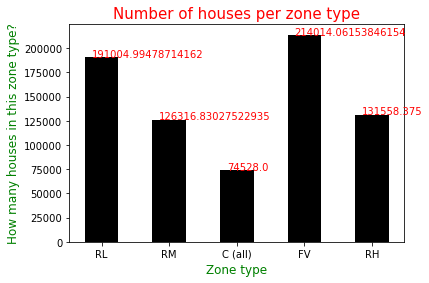

In [49]:
fig, ax = plt.subplots()
plt.bar(x,means, width=0.5, color="black")
plt.xlabel("Zone type", fontsize=12, color="green")
plt.ylabel("How many houses in this zone type?", fontsize=12, color="green")
plt.title("Number of houses per zone type", fontsize=15, color="red")

for i, v in enumerate(means):
    print(i,v)
    ax.text(i-0.15, v+20, str(v), color = 'red')

plt.show()

In [50]:
v = 1.23456
print(v)
print(f"{v:.0f}")

1.23456
1


0 191004.99478714162
1 126316.83027522935
2 74528.0
3 214014.06153846154
4 131558.375


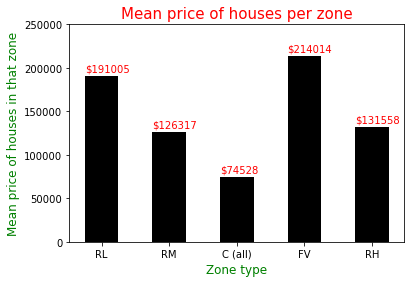

In [51]:
fig, ax = plt.subplots()
plt.bar(x,means, width=0.5, color="black")
plt.xlabel("Zone type", fontsize=12, color="green")
plt.ylabel("Mean price of houses in that zone", fontsize=12, color="green")
plt.ylim(0,250000)
plt.title("Mean price of houses per zone", fontsize=15, color="red")

for i, v in enumerate(means):
    print(i,v)
    ax.text(i-0.25, v+5000, f"${v:.0f}", color = 'red')

plt.show()

# Arbeiten mit quantitativen Merkmalen

## Analyse einer Spalte mit einem quantitativen Merkmal

In [52]:
t2["YearBuilt"]

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

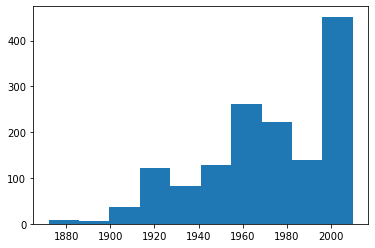

In [53]:
plt.hist( t2["YearBuilt"] )
plt.show()

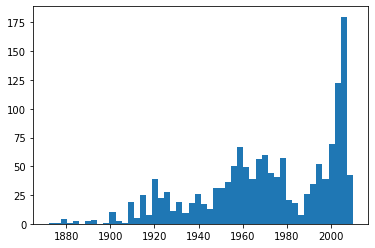

In [54]:
plt.hist( t2["YearBuilt"], bins=50 )
plt.show()

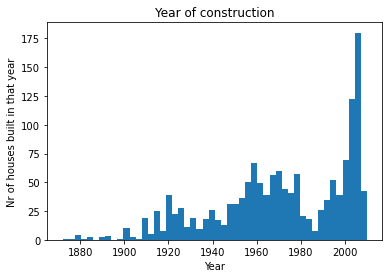

In [55]:
plt.hist( t2["YearBuilt"], bins=50 )
plt.xlabel("Year")
plt.ylabel("Nr of houses built in that year")
plt.title("Year of construction")
plt.show()

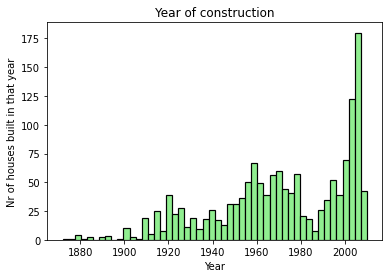

In [56]:
plt.hist( t2["YearBuilt"], bins=50, edgecolor='black', linewidth=1.2, color="lightgreen" )
plt.xlabel("Year")
plt.ylabel("Nr of houses built in that year")
plt.title("Year of construction")
plt.show()

In [57]:
mean_year_built = t2["YearBuilt"].mean()

In [58]:
mean_year_built

1971.267808219178

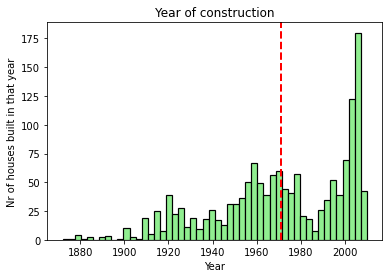

In [59]:
plt.hist( t2["YearBuilt"], bins=50, edgecolor='black', linewidth=1.2, color="lightgreen" )
plt.xlabel("Year")
plt.ylabel("Nr of houses built in that year")
plt.title("Year of construction")
plt.axvline(mean_year_built, color='red', linestyle='dashed', linewidth=2)
plt.show()

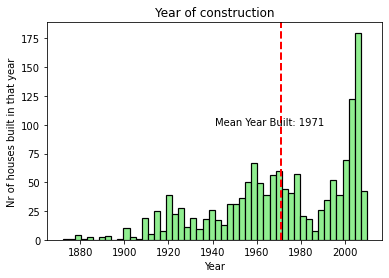

In [60]:
plt.hist( t2["YearBuilt"], bins=50, edgecolor='black', linewidth=1.2, color="lightgreen" )
plt.xlabel("Year")
plt.ylabel("Nr of houses built in that year")
plt.title("Year of construction")
plt.axvline(mean_year_built, color='red', linestyle='dashed', linewidth=2)

plt.text(mean_year_built-30, 100,
         f'Mean Year Built: {mean_year_built:.0f}')

#props = dict(boxstyle='round', facecolor='red', edgecolor="black", alpha=0.9)
#plt.text(mean_year_built-30, 100,
#         f'Mean Year Built: {mean_year_built:.0f}',
#         bbox=props, color="white")


plt.show()

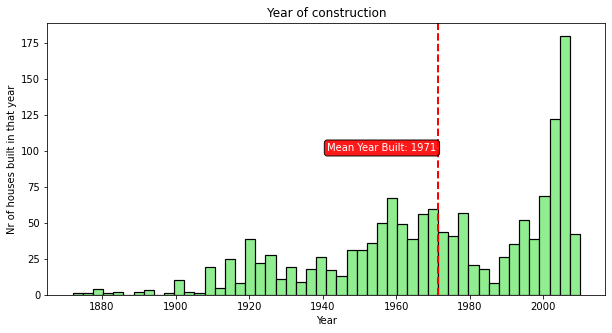

In [61]:
plt.figure(figsize=(10,5))

plt.hist( t2["YearBuilt"], bins=50, edgecolor='black', linewidth=1.2, color="lightgreen" )
plt.xlabel("Year")
plt.ylabel("Nr of houses built in that year")
plt.title("Year of construction")
plt.axvline(mean_year_built, color='red', linestyle='dashed', linewidth=2)

props = dict(boxstyle='round', facecolor='red', edgecolor="black", alpha=0.9)
plt.text(mean_year_built-30, 100,
         f'Mean Year Built: {mean_year_built:.0f}',
         bbox=props, color="white")

plt.savefig("year_of_construction.pdf")
plt.show()

## Eine Hypothese

Hypothese: Neue Häuser kosten mehr

In [62]:
t2

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
0,2003,8450,7,RL,208500
1,1976,9600,6,RL,181500
2,2001,11250,7,RL,223500
3,1915,9550,7,RL,140000
4,2000,14260,8,RL,250000
...,...,...,...,...,...
1455,1999,7917,6,RL,175000
1456,1978,13175,6,RL,210000
1457,1941,9042,7,RL,266500
1458,1950,9717,5,RL,142125


In [63]:
t2["YearBuilt"]

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [64]:
t2["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

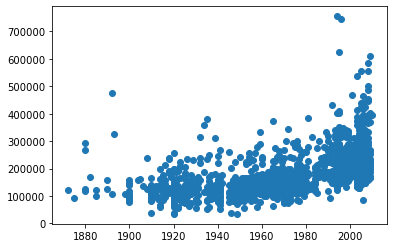

In [65]:
x = t2["YearBuilt"]
y = t2["SalePrice"]

plt.scatter(x,y)
plt.show()

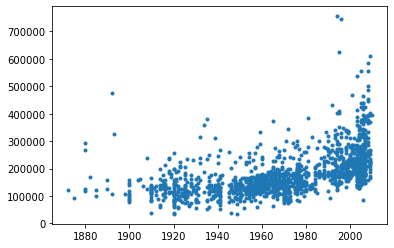

In [66]:
x = t2["YearBuilt"]
y = t2["SalePrice"]

plt.scatter(x,y, marker=".")
plt.show()

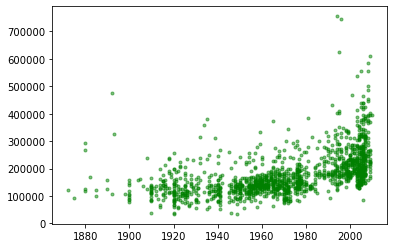

In [67]:
x = t2["YearBuilt"]
y = t2["SalePrice"]

plt.scatter(x,y, marker=".", alpha=0.5, color="green")
plt.show()

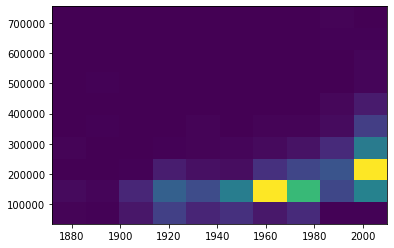

In [68]:
plt.hist2d(x,y)
plt.show()

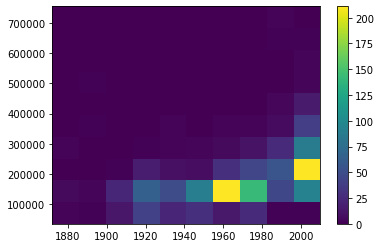

In [69]:
plt.hist2d(x,y)
plt.colorbar()
plt.show()

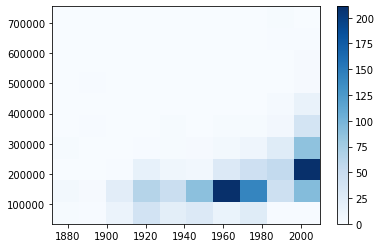

In [70]:
plt.hist2d(x,y, cmap="Blues") # Blues, Greens, Reds, rainbow
plt.colorbar()
plt.show()

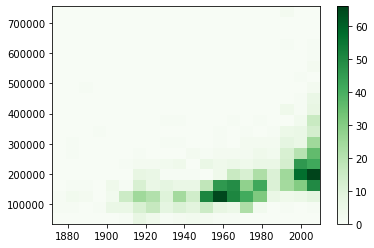

In [71]:
plt.hist2d(x,y, bins=20, cmap="Greens") # Blues, Greens, Reds, rainbow
plt.colorbar()
plt.show()

# Erlernen eines ersten Modells: Lineare Regression

## Lineares Modell mit einem Merkmal erlernen

Lineares Modell mit einem Merkmal:

    sales_price = a0 + a1*year_built

In [72]:
# Die Bibliothek heißt "scikit-learn"
# In Python heißt das Modul "sklearn"
from sklearn.linear_model import LinearRegression

In [73]:
linear_model = LinearRegression()

In [74]:
features = t2["YearBuilt"].values.reshape(-1,1)

In [75]:
features

array([[2003],
       [1976],
       [2001],
       ...,
       [1941],
       [1950],
       [1965]])

In [76]:
features.shape

(1460, 1)

In [77]:
targets = t2["SalePrice"].values

In [78]:
targets

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [79]:
targets.shape

(1460,)

In [80]:
# Eingabe für die fit()-Methode ist:
#                      2-dimensional   1-dimensional
reg = linear_model.fit(features, targets)

In [81]:
reg.coef_

array([1375.37346794])

In [82]:
reg.intercept_

-2530308.2457323573

## Modell anwenden

In [83]:
a0 = reg.intercept_
a1 = reg.coef_[0]

In [84]:
a0

-2530308.2457323573

In [85]:
a1

1375.3734679368924

In [86]:
sales_price = a0 + a1*2000
sales_price

220438.6901414278

In [87]:
import numpy

In [88]:
linear_model.predict( numpy.array( [2000] ).reshape(1,1) ) 

array([220438.69014143])

In [89]:
years_built = [1900,1950,2000]
linear_model.predict( numpy.array( years_built ).reshape(-1,1) ) 

array([ 82901.34334774, 151670.01674458, 220438.69014143])

In [90]:
years_built = numpy.arange(1900,2000,1)

In [91]:
years_built

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999])

In [92]:
years_built = numpy.arange(1900,2000,1)
preds = linear_model.predict( numpy.array( years_built ).reshape(-1,1) )
preds

array([ 82901.34334774,  84276.71681568,  85652.09028361,  87027.46375155,
        88402.83721949,  89778.21068742,  91153.58415536,  92528.9576233 ,
        93904.33109123,  95279.70455917,  96655.07802711,  98030.45149504,
        99405.82496298, 100781.19843092, 102156.57189885, 103531.94536679,
       104907.31883473, 106282.69230267, 107658.0657706 , 109033.43923854,
       110408.81270648, 111784.18617441, 113159.55964235, 114534.93311029,
       115910.30657822, 117285.68004616, 118661.0535141 , 120036.42698203,
       121411.80044997, 122787.17391791, 124162.54738585, 125537.92085378,
       126913.29432172, 128288.66778966, 129664.04125759, 131039.41472553,
       132414.78819347, 133790.1616614 , 135165.53512934, 136540.90859728,
       137916.28206521, 139291.65553315, 140667.02900109, 142042.40246902,
       143417.77593696, 144793.1494049 , 146168.52287284, 147543.89634077,
       148919.26980871, 150294.64327665, 151670.01674458, 153045.39021252,
       154420.76368046, 1

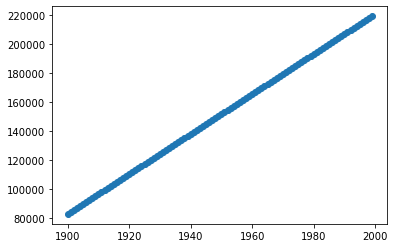

In [93]:
plt.scatter(years_built, preds)
plt.show()

## Lineares Modell mit mehreren Merkmalen erlernen


Lineares Modell mit mehreren Merkmalen:

    sales_price = a0 + a1*year_built + a2*lot_area

In [94]:
features

array([[2003],
       [1976],
       [2001],
       ...,
       [1941],
       [1950],
       [1965]])

In [95]:
features.shape

(1460, 1)

In [96]:
features2 = numpy.zeros( (1460,2) )

In [97]:
features2

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [98]:
features2[0:1460, 0] = t2["YearBuilt"].values

In [99]:
features2

array([[2003.,    0.],
       [1976.,    0.],
       [2001.,    0.],
       ...,
       [1941.,    0.],
       [1950.,    0.],
       [1965.,    0.]])

In [100]:
features2[0:1460, 1] = t2["LotArea"].values

In [101]:
features2

array([[ 2003.,  8450.],
       [ 1976.,  9600.],
       [ 2001., 11250.],
       ...,
       [ 1941.,  9042.],
       [ 1950.,  9717.],
       [ 1965.,  9937.]])

In [102]:
linear_model2 = LinearRegression()

In [103]:
reg = linear_model2.fit(features2, targets)

In [104]:
reg.coef_

array([1365.77615312,    2.04117215])

In [105]:
reg.intercept_

-2532856.0245703217

## Lineares Modell mit mehreren Merkmalen anwenden

In [106]:
input_data = numpy.array( [2000,5000] ).reshape(1,2)

In [107]:
input_data

array([[2000, 5000]])

In [108]:
linear_model2.predict( input_data )

array([208902.14242167])

In [109]:
input_data = numpy.array( [2000,15000] ).reshape(1,2)
linear_model2.predict( input_data )

array([229313.86390768])

## Testen der Güte des linearen Modells

In [110]:
features2.shape

(1460, 2)

In [111]:
targets.shape

(1460,)

In [112]:
x_train = features2[:1000]
y_train = targets[:1000]

x_test = features2[1000:]
y_test = targets[1000:]

In [113]:
x_train.shape

(1000, 2)

In [114]:
y_train.shape

(1000,)

In [115]:
x_test.shape

(460, 2)

In [116]:
y_test.shape

(460,)

In [117]:
linear_model3 = LinearRegression()
reg = linear_model3.fit(x_train, y_train)

In [118]:
reg.coef_, reg.intercept_

(array([1407.10959291,    1.84949736]), -2611792.5588071737)

In [119]:
predicted_saleprices = linear_model3.predict( x_test )

In [120]:
predicted_saleprices[:10]

array([153761.33662999,  99845.14533148, 232983.72452914, 189925.21644717,
       215347.27557786, 185571.14175502, 182693.97966236, 164313.67487106,
       230467.27441874, 109397.50130659])

In [121]:
predicted_saleprices.shape

(460,)

In [122]:
y_test[:10]

array([ 82000,  86000, 232000, 136905, 181000, 149900, 163500,  88000,
       240000, 102000])

In [123]:
errors = y_test - predicted_saleprices

In [124]:
errors[:10]

array([-71761.33662999, -13845.14533148,   -983.72452914, -53020.21644717,
       -34347.27557786, -35671.14175502, -19193.97966236, -76313.67487106,
         9532.72558126,  -7397.50130659])

In [125]:
errors.mean()

-1672.4434489861344

In [126]:
abs(errors).mean()

44246.55562048729

## Quantitative Analyse des linearen Zusammenhangs

In [127]:
from scipy.stats.stats import pearsonr

In [128]:
x = [10,20,30,40,50]
y = [50,100,150,200,250]

In [129]:
pearsonr(x,y)[0]

0.9999999999999999

In [130]:
x = [10,20,30,40,50]
y = [250,200,150,100,50]

In [131]:
pearsonr(x,y)[0]

-0.9999999999999999

In [132]:
pearsonr(x,y)[0]

-0.9999999999999999

In [133]:
pearsonr(t2["YearBuilt"], t2["SalePrice"])[0]

0.5228973328794968

In [134]:
pearsonr(t2["LotArea"], t2["SalePrice"])[0]

0.2638433538714057

## Scatter matrix

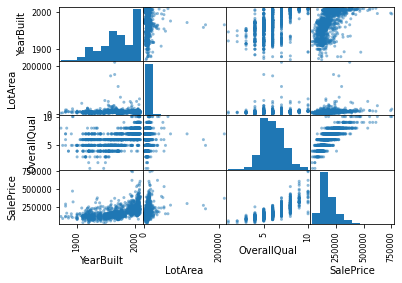

In [135]:
ret = pandas.plotting.scatter_matrix(t2)

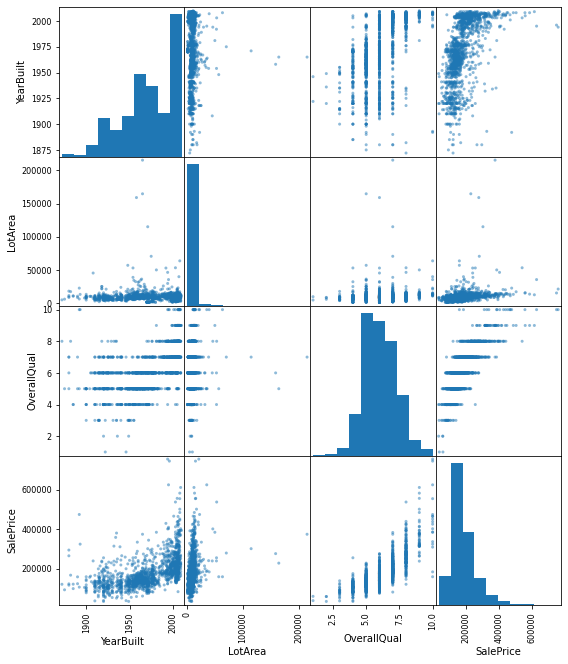

In [136]:
ret = pandas.plotting.scatter_matrix(t2, figsize=(9,11) )

In [137]:
pearsonr(t2["OverallQual"], t2["SalePrice"])[0]

0.7909816005838048

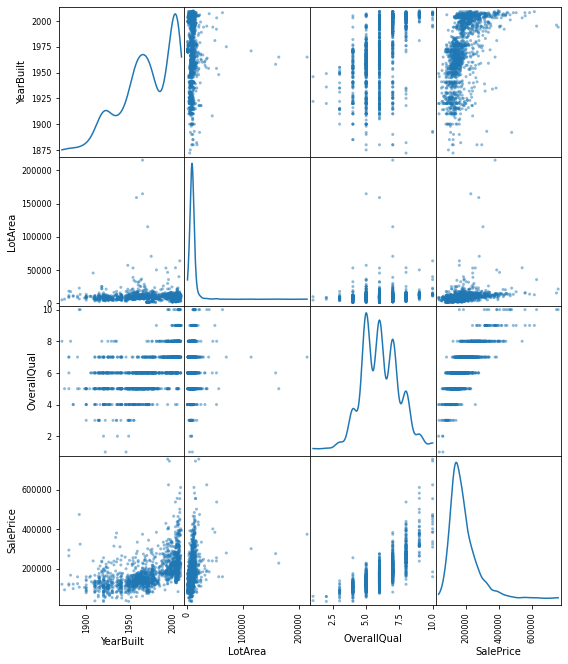

In [138]:
ret = pandas.plotting.scatter_matrix(t2, figsize=(9,11), diagonal='kde' )

# Erlernen eines zweiten Modells: Neuronales Netz

## Input-Merkmale leben alle in einem unterschiedlichen Bereich

In [143]:
x_train[:5]

array([[ 2003.,  8450.],
       [ 1976.,  9600.],
       [ 2001., 11250.],
       [ 1915.,  9550.],
       [ 2000., 14260.]])

In [142]:
y_train[:5]

array([208500, 181500, 223500, 140000, 250000])

In [144]:
x_test[:5]

array([[ 1952., 10206.],
       [ 1920.,  5400.],
       [ 2006., 11957.],
       [ 1976., 11500.],
       [ 2005.,  3182.]])

In [145]:
y_test[:5]

array([ 82000,  86000, 232000, 136905, 181000])

## Wir haben noch mehr Input-Merkmale in der Tabelle

Transformation qualitativer Merkmale in numerische Merkmale

In [147]:
t2

,YearBuilt,LotArea,OverallQual,MSZoning,SalePrice
0,2003,8450,7,RL,208500
1,1976,9600,6,RL,181500
2,2001,11250,7,RL,223500
3,1915,9550,7,RL,140000
4,2000,14260,8,RL,250000
...,...,...,...,...,...
1455,1999,7917,6,RL,175000
1456,1978,13175,6,RL,210000
1457,1941,9042,7,RL,266500
1458,1950,9717,5,RL,142125


In [153]:
t3 = pandas.get_dummies(t2)

In [154]:
t3

,YearBuilt,LotArea,OverallQual,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,2003,8450,7,208500,0,0,0,1,0
1,1976,9600,6,181500,0,0,0,1,0
2,2001,11250,7,223500,0,0,0,1,0
3,1915,9550,7,140000,0,0,0,1,0
4,2000,14260,8,250000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1455,1999,7917,6,175000,0,0,0,1,0
1456,1978,13175,6,210000,0,0,0,1,0
1457,1941,9042,7,266500,0,0,0,1,0
1458,1950,9717,5,142125,0,0,0,1,0


## Features-Tabe'lle und Targets-Tabelle festlegen

In [186]:
targets = t3["SalePrice"]

In [187]:
features = t3.drop( "SalePrice", axis=1 )

In [188]:
features

,YearBuilt,LotArea,OverallQual,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,2003,8450,7,0,0,0,1,0
1,1976,9600,6,0,0,0,1,0
2,2001,11250,7,0,0,0,1,0
3,1915,9550,7,0,0,0,1,0
4,2000,14260,8,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1455,1999,7917,6,0,0,0,1,0
1456,1978,13175,6,0,0,0,1,0
1457,1941,9042,7,0,0,0,1,0
1458,1950,9717,5,0,0,0,1,0


In [189]:
targets

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Einführung: MinMax-Scaler

In [166]:
from sklearn.preprocessing import MinMaxScaler

In [168]:
M = numpy.arange(1,36).reshape(5,7)

In [169]:
M

array([[ 1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19, 20, 21],
       [22, 23, 24, 25, 26, 27, 28],
       [29, 30, 31, 32, 33, 34, 35]])

In [170]:
scaler = MinMaxScaler()

In [171]:
M_scaled = scaler.fit_transform(M)

In [172]:
M_scaled

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]])

## Skalierung der Features und Targets

In [180]:
scaler_features = MinMaxScaler()
scaler_targets  = MinMaxScaler()

In [190]:
features_scaled = scaler_features.fit_transform( features )

In [191]:
features_scaled[:5]

array([[0.94927536, 0.0334198 , 0.66666667, 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.75362319, 0.03879502, 0.55555556, 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.93478261, 0.04650728, 0.66666667, 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.3115942 , 0.03856131, 0.66666667, 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.92753623, 0.06057632, 0.77777778, 0.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [192]:
features[:5]

,YearBuilt,LotArea,OverallQual,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,2003,8450,7,0,0,0,1,0
1,1976,9600,6,0,0,0,1,0
2,2001,11250,7,0,0,0,1,0
3,1915,9550,7,0,0,0,1,0
4,2000,14260,8,0,0,0,1,0


In [193]:
targets_scaled = scaler_targets.fit_transform( targets.values.reshape(-1,1) )

In [195]:
targets_scaled

array([[0.24107763],
       [0.20358284],
       [0.26190807],
       ...,
       [0.321622  ],
       [0.14890293],
       [0.15636717]])

In [196]:
targets

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Splitten der Daten in Trainings- und Testdaten

In [197]:
x_train = features_scaled[:1000]
y_train = targets_scaled[:1000]

x_test = features_scaled[1000:]
y_test = targets_scaled[1000:]

In [198]:
x_train.shape

(1000, 8)

In [199]:
y_train.shape

(1000, 1)

In [200]:
x_train[:3]

array([[0.94927536, 0.0334198 , 0.66666667, 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.75362319, 0.03879502, 0.55555556, 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.93478261, 0.04650728, 0.66666667, 0.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [201]:
y_train[:3]

array([[0.24107763],
       [0.20358284],
       [0.26190807]])

In [202]:
print( x_train[0], "-->", y_train[0] )

[0.94927536 0.0334198  0.66666667 0.         0.         0.
 1.         0.        ] --> [0.24107763]


In [203]:
print( x_test[0], "-->", y_test[0] )

[0.57971014 0.04162752 0.22222222 0.         0.         0.
 1.         0.        ] --> [0.06540758]


## Neuronales Netz vorbereiten

In [204]:
x_train.shape

(1000, 8)

In [205]:
nr_inputs = x_train.shape[1]

In [208]:
nr_inputs

8

In [206]:
y_train.shape

(1000, 1)

In [207]:
nr_outputs = y_train.shape[1]

In [209]:
nr_outputs

1

In [211]:
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Dense(80,
                             activation="relu",
                             input_shape=(nr_inputs,),
                             name="Layer1"))
                             
model.add(keras.layers.Dense(nr_outputs,
                             activation="linear",
                             name="OutputLayer"))

model.compile(optimizer='sgd',           
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 80)                720       
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 81        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


## Neuronales Netz trainieren

In [212]:
history = model.fit(x_train,
                    y_train,
                    epochs=200)

2021-10-21 11:13:15.840903: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-21 11:13:15.863111: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz


Epoch 1/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 2.9857e-04
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 2.9857e-04
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.0017
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.0016
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 1.8919e-04
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 3.7920e-04
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 3.3802e-04
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.5537e-04
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 4.6733e-04
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0087 

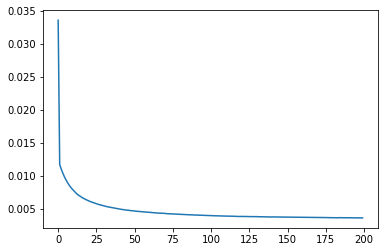

In [213]:
plt.plot(history.history["loss"])
plt.show()

## Neuronales Netz testen

In [214]:
preds_scaled_dollars = model.predict( x_test )

In [215]:
preds_scaled_dollars[:5]

array([[0.05311172],
       [0.11946194],
       [0.33895868],
       [0.14320673],
       [0.2641372 ]], dtype=float32)

In [216]:
y_test[:5]

array([[0.06540758],
       [0.07096237],
       [0.27371198],
       [0.14165394],
       [0.20288849]])

In [217]:
preds_dollars = scaler_targets.inverse_transform( preds_scaled_dollars )

In [218]:
groundtruth_dollars = scaler_targets.inverse_transform( y_test )

In [219]:
preds_dollars[:5]

array([[ 73145.75],
       [120924.54],
       [278984.16],
       [138023.17],
       [225105.2 ]], dtype=float32)

In [220]:
groundtruth_dollars[:5]

array([[ 82000.],
       [ 86000.],
       [232000.],
       [136905.],
       [181000.]])

In [223]:
abs(groundtruth_dollars - preds_dollars).mean()

29104.377284307066

## Speichern des Modells

In [224]:
model.save("saleprice_predictor")

INFO:tensorflow:Assets written to: saleprice_predictor/assets


2021-10-21 11:20:02.383750: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [225]:
import pickle
fname = "scaler_features.pkl"
fobj = open(fname, "wb")
pickle.dump(scaler_features, fobj)
fobj.close()

In [226]:
import pickle
fname = "scaler_targets.pkl"
fobj = open(fname, "wb")
pickle.dump(scaler_targets, fobj)
fobj.close()

## Modell wiederherstellen

In [227]:
from tensorflow import keras

new_model = keras.models.load_model("saleprice_predictor")

fobj = open("scaler_features.pkl", "rb")
scaler_features = pickle.load(fobj)
fobj.close()

fobj = open("scaler_targets.pkl", "rb")
scaler_targets = pickle.load(fobj)
fobj.close()

In [228]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 80)                720       
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 81        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


## Modell anwenden

In [230]:
year_built = float(input("Year built:"))
lot_area = float(input("Lot area:"))
quality = float(input("Overall quality:"))

Year built: 2000
Lot area: 5000
Overall quality: 5


In [231]:
input_matrix = scaler_features.transform( [[year_built, lot_area, quality, 0,0,0,1,0]] )

In [232]:
input_matrix

array([[0.92753623, 0.01729416, 0.44444444, 0.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [233]:
pred = new_model.predict( input_matrix )

In [234]:
pred

array([[0.14911969]], dtype=float32)

In [235]:
pred_dollar = scaler_targets.inverse_transform( pred )

In [236]:
pred_dollar

array([[142281.1]], dtype=float32)

In [237]:
print( f"You can sell your house for ${pred_dollar[0][0]}" )

You can sell your house for $142281.09375
